<a href="https://colab.research.google.com/github/Anitayea/Linear_and_Nonlinear_Optimization/blob/recitations/recitation1_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recitation 1
Much of the recitation was taken shamelessly from Alfred's course below. I have appended my notes of additional topics covered at the end of his notes so some of this may be in a slightly different order than covered in class

# <center>Crash course 1: Vectors and matrices in numpy and scipy</center>
### <center>Alfred Galichon (NYU & ScPo) and Clément Montes (ScPo)</center>
## <center>'math+econ+code' masterclass on optimal transport and economic applications</center>
#### <center>With python code examples</center>
© 2018-2022 by Alfred Galichon. Past and present support from NSF grant DMS-1716489, ERC grant CoG-866274 are acknowledged, as well as inputs from contributors listed [here](http://www.math-econ-code.org/theteam).

**If you reuse material from this masterclass, please cite as:**<br>
Alfred Galichon, 'math+econ+code' masterclass on optimal transport and economic applications, January 2022. https://github.com/math-econ-code/mec_optim

# Introducing NumPy

* Unlike R or Matlab, Python has no built-in matrix algebra interface. Fortunately, the NumPy library provides powerful matrix capabilities, on par with R or Matlab. Here is a quick introduction to vectorization, operations on vectors and matrices, higher-dimensional arrays, Kronecker products and sparse matrices, etc. in NumPy.

* This is *not* a tutorial on Python itself. They are plenty good ones available on the web.

* First, we load numpy (with its widely used alias):

In [ ]:
import numpy as np

In NumPy, an `array` is built from a lists as follows:

In [ ]:
u = np.array([1,2,3])
print(u)
v = np.array([3,2,5])
print(v)

[1 2 3]
[3 2 5]


One can then add arrays as:

In [ ]:
print(np.array([1,2,3])+np.array([3,2,5]))

[4 4 8]


Note the difference between the + operator when applied to numpy arrays vs. when applied to lists:

In [ ]:
[1,2,3]+[3,2,5]

[1, 2, 3, 3, 2, 5]

In the latter case, it returns list concatenation.

To input matrices in NumPy, one simply inputs a list of rows, which are themselves represented as lists.

In [ ]:
A = np.array([[11,12],[21,22],[31,32]])
A

array([[11, 12],
       [21, 22],
       [31, 32]])

The `shape` attribute of an array indicated the dimension of that array.

In [ ]:
A.shape

(3, 2)

## Vectorization and memory order

* Matrices in all mathematical softwares are represented in a *vectorized* way as a sequence of numbers in the computers memory. This representation can involve either stacking the lines, or stacking the columns.

* Different programming languages can use either of the two stacking conventions:
    + Stacking the lines (Row-major order) is used by `C`, and is the default convention for Python (NumPy). A matrix $M$ is represented by varying the last index first, i.e. a $2\times2$ matrix will be represented as $vec_C\left(M\right) = \left(M_{11}, M_{12}, M_{21}, M_{22}\right).$ 
    + Stacking the columns (Column-major order) is used by `Fortran`, `Matlab`, `R`, and most underlying core linear algebra libraries (like BLAS). A 2x2x2 3-dimensional array $A$ will be represented by varying the first index first, then the second, i.e. $vec_C\left(A\right) = \left( A_{111}, A_{112}, A_{121}, A_{122}, A_{211}, A_{212}, A_{221}, A_{222} \right)$. 

The command `flatten()` provides the vectorized representation of a matrix.

In [ ]:
A.flatten()

array([11, 12, 21, 22, 31, 32])

Remember, NumPy represents matrices by **varying the last index first**.

In order to reshape the matrix `a`, one modifies its `shape` attribute. The following reshapes the matrix `a` into a row vector. 

In [ ]:
A.shape = 1,6
A

array([[11, 12, 21, 22, 31, 32]])

The previous output evidences the fact that Python uses the row-major order: rows are stacked one after the other. 
To reshape the vector into a column vector, do:

In [ ]:
A.shape = 6,1
A

array([[11],
       [12],
       [21],
       [22],
       [31],
       [32]])

Equivalently, one could have set `A.shape=6,-1`, where Python would replace `-1` by the integer needed for the formula to make sense (in this case, `1`). 
Another way to reshape is to use the method `reshape,` which returns a duplicate of the object with the requested shape.

In [ ]:
A1=np.array(range(6))
A2 = A1.reshape(3,2)
print("A1=\n", A1)
print("A2=\n",A2)

A1=
 [0 1 2 3 4 5]
A2=
 [[0 1]
 [2 3]
 [4 5]]


Note that `NumPy` also supports the column-major order, but you have to specifically ask for it, by passing the optional argument `order='F'`, where 'F' stands for `Fortran`.

In [ ]:
A3 = np.array(range(6)).reshape(3,2, order='F')
A3

array([[0, 3],
       [1, 4],
       [2, 5]])

# Multiplication 

### Multiplication of arrays

There are several ways to multiply two arrays using NumPy. The most commonly used is the following.

In [ ]:
A = np.ones((2,2))
B = 3*np.eye(2)
A@B #@ is left associative. If you have A@B@C, it will compute (A@B)@C

array([[3., 3.],
       [3., 3.]])

Note that `np.matmul(A,B)` would give the same result as well, but it is more difficult to read `np.matmul(A,np.matmul(B,C))` than `A@B@C`.

### Multiplication by a scalar

In [ ]:
4*np.eye(2)

array([[4., 0.],
       [0., 4.]])

The above assignation of B corresponds to the multiplication by a scalar. It is the simplest broadcasting allowed by numpy (which makes this library more powerful than just using lists -it is also much quicker-). More on broadcasting will arrive later in that Notebook.

## Kronecker product

A very important identity is
\begin{align*}
vec_C\left(AXB\right) = \left(  A\otimes B^\top\right)  vec_C\left(X\right),
\end{align*}
where $vec_C$ is the vectorization under the C (row-major) order, and where the Kronecker product $\otimes$ is defined as follows for 2x2 matrices (with obvious generalization):

\begin{align*}
A\otimes B=
\begin{pmatrix}
a_{11}B & a_{12}B\\
a_{21}B & a_{22}B
\end{pmatrix}.
\end{align*}



In [ ]:
A = np.eye(2)

AXB = np.kron(A, B)
print("A=",A)
print("B=",B)
print("AXB=",AXB)

A= [[1. 0.]
 [0. 1.]]
B= [[3. 0.]
 [0. 3.]]
AXB= [[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]


## Type broadcasting in NumPy


The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. 

Subject to certain constraints, the smaller array is “broadcasted” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations.

In [ ]:
A = 10*np.array([[1],[2],[3]]) #Simplest broadcasting
B =  np.array([1,2])
print('A=\n',A)
print('B=\n',B)
print('A+B=\n',A+B)

A=
 [[10]
 [20]
 [30]]
B=
 [1 2]
A+B=
 [[11 12]
 [21 22]
 [31 32]]


The operation `A[:,np.newaxis]` creates a new dimension.

In [ ]:
v = np.array([3,4,5])
print(v)
print(v[:,np.newaxis])
print(v[np.newaxis,:])

[3 4 5]
[[3]
 [4]
 [5]]
[[3 4 5]]


# Arrays of larger dimensions

In [ ]:
a_3d_array = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
a_3d_array

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

Standard functions can also support arrays with more than 2 dimensions.

In [ ]:
a_multiarray = np.zeros((2,3,3,3))
print(a_multiarray, a_multiarray.shape)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]] (2, 3, 3, 3)


# Searching for a maximum

### Maximum between 2 arrays

To compare two arrays (say $x$ and $y$) component by component, it is convenient to use `np.maximum`. It returns an array $z$ such that $ \forall i: z[i] = \max(x[i],y[i])$. 

In [ ]:
np.maximum(np.array([2, 3, 4]), np.array([1, 5, 2]))

array([2, 5, 4])

You can even broadcast.

In [ ]:
np.maximum(np.eye(2), [0.5, 2]) # broadcasting

array([[1. , 2. ],
       [0.5, 2. ]])

### Highest component within an array

`np.max` and `np.argmax` respectively find the maximum entry of a given array along a specified axis, and its index. `np.min` and `np.argmin` perform similar functions.

In [ ]:
A = np.array([[0, 1,3], [0, 5,7]])
A

array([[0, 1, 3],
       [0, 5, 7]])

In [ ]:
A.max(axis=0)

array([0, 5, 7])

In [ ]:
A.argmax(axis=0)

array([0, 1, 1])

In [ ]:
A.max(axis=1)

array([3, 7])

In [ ]:
A.min(axis=0)

array([0, 1, 3])

In [ ]:
A.argmin(axis=0)

array([0, 0, 0])

If `axis` is not specified, the maximum will be taken over all the entries of the matrix.

In [ ]:
np.max(A) 

7

Note: if your array contains a nan, you can use `np.nanmax` in order to ignore those values while searching for the highest component.

## Summing all elements of an array

In a similar fashion as above, `np.sum` sums the elements of an array over a given axis.

In [ ]:
A.sum( axis=0)

array([ 0,  6, 10])

In [ ]:
A.sum(axis=1)

array([ 4, 12])

If `axis` is not specified, the sum is done over all the entries of the matrix.


In [ ]:
A.sum()

16

# Sparse matrices in Scipy

Sparse matrices are available in the `sparse` module of the `scipy` library. 

In [ ]:
import scipy.sparse as spr

In [ ]:
n = 1000

print('size of sparse identity matrix of size '+str(n) +' in MB = ' + str(spr.identity(n).data.size  / (1024**2)))

print('size of dense identity matrix of size '+str(n) +' in MB  = ' + str(spr.identity(n).todense().nbytes  / (1024**2)))

size of sparse identity matrix of size 1000 in MB = 0.00095367431640625
size of dense identity matrix of size 1000 in MB  = 7.62939453125


Working with sparse matrices requires less storage. It is explained by the fact that while a dense matrix needs to encode every coefficient on a byte, sparse matrices only store the non-null coefficients. It is really convenient to work with such objects when it comes to matrices with really high sizes.

In [ ]:
spr.identity(1000).data.size  , spr.identity(1000).todense().nbytes 

(1000, 8000000)

## Creating sparse matrices...

### ... with standard forms

In [ ]:
I5 = spr.identity(5)
I5

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements (1 diagonals) in DIAgonal format>

You can convert your sparse matrix into a dense one in order to visualise it. 

In [ ]:
I5.todense()

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

### ... from a dense matrix

Let's create a dense matrix and make it sparse.

In [ ]:
# import uniform module to create random numbers
from scipy.stats import uniform

In [ ]:
np.random.seed(seed=42)
dense_matrix = uniform.rvs(size=16, loc = 0, scale=2) #List of 16 random draws between 0 and 2
dense_matrix = np.reshape(dense_matrix, (4, 4))
dense_matrix

array([[0.74908024, 1.90142861, 1.46398788, 1.19731697],
       [0.31203728, 0.31198904, 0.11616722, 1.73235229],
       [1.20223002, 1.41614516, 0.04116899, 1.9398197 ],
       [1.66488528, 0.42467822, 0.36364993, 0.36680902]])

In [ ]:
dense_matrix[dense_matrix < 1] = 0 #Arbitrar criterion
dense_matrix

array([[0.        , 1.90142861, 1.46398788, 1.19731697],
       [0.        , 0.        , 0.        , 1.73235229],
       [1.20223002, 1.41614516, 0.        , 1.9398197 ],
       [1.66488528, 0.        , 0.        , 0.        ]])

In [ ]:
sparse_matrix = spr.csr_matrix(dense_matrix)
print(sparse_matrix) #It prints a tuple giving the row and columns of the non-null component and its value.

  (0, 1)	1.9014286128198323
  (0, 2)	1.4639878836228102
  (0, 3)	1.1973169683940732
  (1, 3)	1.7323522915498704
  (2, 0)	1.2022300234864176
  (2, 1)	1.416145155592091
  (2, 3)	1.9398197043239886
  (3, 0)	1.6648852816008435


### ... from scratch

You can create two arrays containing respectively the rows and the column of the non-null coefficients.
A third array would give the value of the non-null coefficient. The result is as follows:

In [ ]:
# row indices
row_ind = np.array([0, 1, 1, 3, 4])
# column indices
col_ind = np.array([0, 2, 4, 3, 4])
# coefficients
data = np.array([1, 2, 3, 4, 5], dtype=float)

mat_coo = spr.coo_matrix((data, (row_ind, col_ind)))
print(mat_coo)

  (0, 0)	1.0
  (1, 2)	2.0
  (1, 4)	3.0
  (3, 3)	4.0
  (4, 4)	5.0


### Every common operation seen below works with sparse matrices.

In [ ]:
I5 = spr.identity(5)
I5 + np.ones((5,5))

matrix([[2., 1., 1., 1., 1.],
        [1., 2., 1., 1., 1.],
        [1., 1., 2., 1., 1.],
        [1., 1., 1., 2., 1.],
        [1., 1., 1., 1., 2.]])

In [ ]:
I5 + np.diag([1.,2.,3.,4.,5.])

matrix([[2., 0., 0., 0., 0.],
        [0., 3., 0., 0., 0.],
        [0., 0., 4., 0., 0.],
        [0., 0., 0., 5., 0.],
        [0., 0., 0., 0., 6.]])

In [ ]:
I5 @ np.diag([1.,2.,3.,4.,5.])

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])

In [ ]:
kron_product = spr.kron(I5 , 10 *np.array([[1,2],[3,4]]))

In [ ]:
kron_product.todense()

matrix([[10., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10., 20.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 30., 40.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 10., 20.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 30., 40.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 10., 20.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 30., 40.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 20.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30., 40.]])

## This is where my additions to the notes begin

## Jupyter notebooks
After openning up a new google colab file you can rename the file then begin coding and writing comments in text. In the top left you can create a new code or text block. Remember that code will excute in the order you run it so running code earlier in notebook may not have the same result if you've changed variables later in the notebook and haven't reset the notebook. The numbers next to the blocks tell you the order in which the blocks were executed. It is good practice to make sure that when the notebook is restarted and ran it will give the desired result. Additionally by going to view and executed code history you can look at previous versions of cells if you need to recover something from earlier in the session (this is lost when you close the window and open the file again!). 

Additionally, the [google colab web](https://colab.research.google.com/) page has good resources about how to use colab and some of its advantages over a standard jupyter notebook. I may mention some of these throughout the course but if you are interested I recommend looking through their resources.

Also as demonstrated above you can insert hyperlinks (as well as images)

This is where you can put text. When you do homework you can explain your answers in text boxes.

You can even use math symbols if you are familiar with latex:
\begin{align}
\frac{df}{dx} &= \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}\\ 
&= f'(x)
\end{align}

You can also do inline math if you want: $g(x) = f'(x)$

If you aren't familiar with latex I recommend learning enough to write equations in your notebooks as it might come in handy (though I do know if it a requirement). A useful tool is [detexify](https://detexify.kirelabs.org/classify.html) which tells you the text command for a symbol you write



In [ ]:
#remember that when you asign a variable a value it only references any used variables when it records the value, not later when it is called:
x = 5
y = x*3
x = 2
print(y)

15


#functinons
functions must be defined before they are used and execute using the input variables as they are currently defined. However, setting a variable equal to the output of a function acts the same way as before

In [ ]:
def func_example(x):
  y = x*3
  return y

In [ ]:
print(func_example(x))

6


In [ ]:
y = func_example(x)
x = 10
print(y)

6


## loops

In [ ]:
for i in np.arange(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
i = 0
while i < 10:
  print(i)
  i+=1 #this is the same as i=i+1

0
1
2
3
4
5
6
7
8
9


A quick note on optimizing loops for speed and for easier reading (see [Transforming Code into Beautiful, idiomatic python](https://youtu.be/OSGv2VnC0go) )

In [ ]:
import time

colors = ["red","orange","yellow","green","blue","indigo","violet"]

t = time.time()

for i in range(len(colors)):
  print(colors[i])

elapsed = time.time() - t
print(elapsed)

for color in colors:
  print(color)

elapsed2 = time.time() - t - elapsed
print(elapsed2)
print(elapsed/elapsed2)

red
orange
yellow
green
blue
indigo
violet
0.004069805145263672
red
orange
yellow
green
blue
indigo
violet
0.003556489944458008
1.144331970235302


If you want some code in your text block

```
# This is formatted as code
```
you can do this. This code doesn't run and affect the code run in the notebook and is a good way to show examples of code that you don't want to run for some reason (maybe failed attempts or something you tried but couldn't get to work). This may be easier than including a code block thne overwriting relavent variables.

Of course you can also **bold** and *italicise* your text and even make lists:

1.   List item
2.   List item
or bullets:


*   List item
*   List item

and make new sections

# New Section

# Introduction to matplotlib

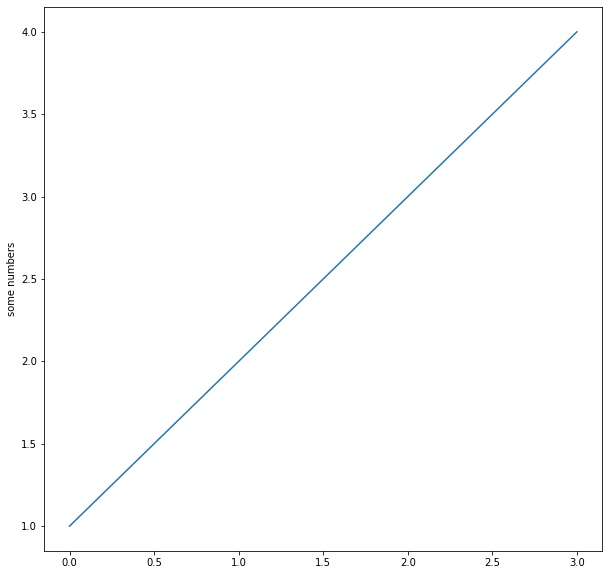

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] #resize plots

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

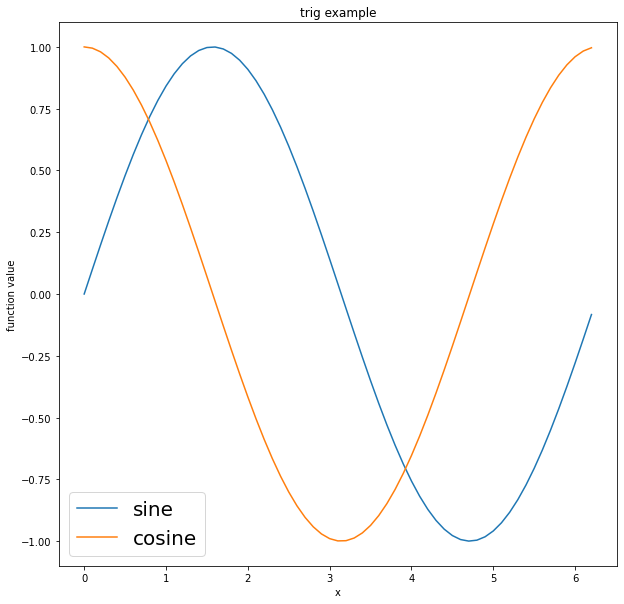

In [ ]:
x = np.arange(0,2*np.pi,0.1)
y = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y)
plt.plot(x,y2)
plt.ylabel('function value')
plt.title('trig example')
plt.xlabel('x')
plt.legend(['sine', 'cosine'], prop={'size': 20})
plt.show()

## an example I did not cover in recitation
This is an example of a 2d plot using plt
It also shows how you can use np to make a grid
The details of this example are less important, it is more just a demonstration of other things you can do with python and plt

In [ ]:
x = np.arange(0,1,0.1)
y = np.arange(1,2,0.1)
X,Y = np.meshgrid(x,y)
X.shape

(10, 10)

In [ ]:
print(x)
print(X)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]]


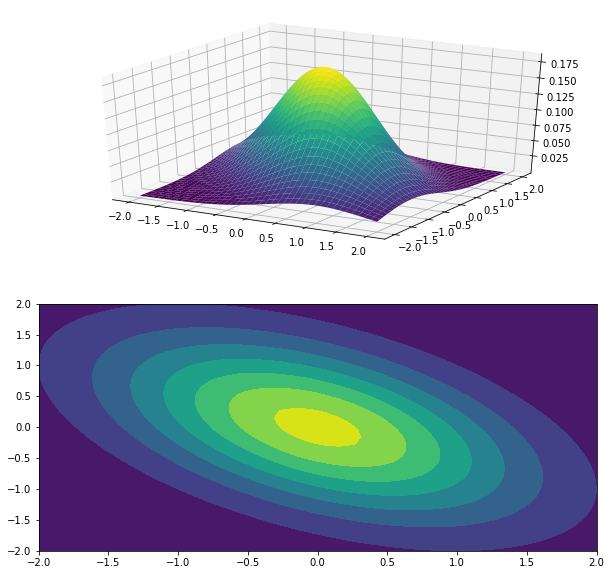

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu) #einstein summation
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure() #creates figure
ax1 = fig.add_subplot(2,1,1,projection='3d') #creates first subplot, 3d allows us to plot a surface graph

ax1.plot_surface(X, Y, Z, cmap=cm.viridis)

ax2 = fig.add_subplot(2,1,2) #now we plot a contour map of the function
ax2.contourf(X, Y, Z, cmap=cm.viridis)

plt.show()

An advantage to defining the multi-variate gaussian as a function is that now we can plot another graph using the same function and just tweek the variables.
We may even want to create a function to plot the function so we don't have to repeat that again

In [ ]:
def plot_gaussian(pos, mu, Sigma):
  Z = multivariate_gaussian(pos, mu, Sigma)
  
  # plot using subplots 
  fig = plt.figure() #creates figure
  
  ax1 = fig.add_subplot(2,1,1,projection='3d') #creates first subplot, 3d allows us to plot a surface graph
  ax1.plot_surface(X, Y, Z, cmap=cm.viridis)
  
  ax2 = fig.add_subplot(2,1,2) #now we plot a contour map of the function
  ax2.contourf(X, Y, Z, cmap=cm.viridis)
  
  plt.show() #note that we do not need to return a value and we can have spaces in the function, it is the indentation that marks when the function ends

now let us use this function to make another plot by changing the mean and covariance then runing the function

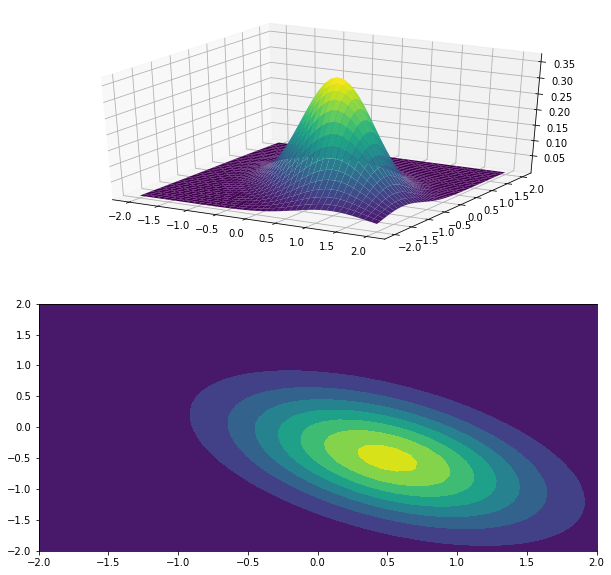

In [ ]:
# Mean vector and covariance matrix
mu = np.array([0.5, -0.5])
Sigma = np.array([[ 0.5 , -0.25], [-0.25,  0.5]])

#now we can easily run our function and visualize how moving the mean and  changing the covariance has change the gaussian
plot_gaussian(pos, mu, Sigma)